In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# KNN算法计算近邻距离，并对待检测样本划分类别
def kNN_classifier(k,x_train,y_train,x_new):
    if k<1 or k>x_train.shape[0]:
        print("k值设定有误，请重新指定近邻数！")
        return None
    if x_train.shape[0] !=y_train.shape[0]:
        print("样本数据和样本类别标签规模必须一致！请检查输入数据！")
        return None
    if x_train.shape[1] != x_new.shape[0]:
        print("待测数据与训练数据的特征维度不一致！")
        return None
    
    # 计算新样本点与所有训练数据集中的样本点的欧式距离
    distances = [np.sqrt(np.sum((x_new - x)**2)) for x in x_train]
    print("distances:")
    print(distances)

    # 对距离进行倒排序,返回的是排序之后的索引位置
    # np.argsort()是将X中的元素从小到大排序后，提取对应的索引index
    nearest = np.argsort(distances)
    print("nearest:")
    print(nearest)

    #获取最近邻的标签类别
    topk_y =[y_train[i] for i in nearest[:k]]
    print("topk_y:")
    print(topk_y)

    #进行投票
    votes= Counter(topk_y)
    print("votes:")
    print(votes) #形如：Counter({1:2,0:1})

    """
    most_commom()函数用法示例:
    votes.most_common(5) #  #取前5的结果，也就是说计数最多的前5个
    比如返回值为：[(1, 5), (2, 3), (4, 2), (5, 2), (6, 1)]
    most_common()函数返回的结果是元组列表，不是字典
    """

    #返回票数最多的标签值
    return votes.most_common(1)[0][0]

In [3]:
#源数据可视化
def raw_data_visualization(x_train,y_train,x_new):
    plt.scatter(x_train[y_train==0,0],x_train[y_train==0,1],color='g')
    plt.scatter(x_train[y_train==1,0],x_train[y_train==1,1],color='r')
    plt.scatter(x_new[0],x_new[1],color='b',marker='^')
    plt.show()

In [4]:
#先创建好数据集x_train,y_train
raw_data_x=[[4.3935, 2.3313],
              [4.1101, 1.7815],
              [3.3438, 3.3684],
              [3.5823, 4.6792],
              [3.2804, 2.8670],
              [6.3603, 3.0724],

              [8.1305, 2.7432],
              [7.4234, 4.6965],
              [5.7451, 3.5340],
              [9.1722, 2.5111],
              [7.7928, 3.4241],
              [7.9398, 0.7916]]
raw_data_y=[0,0,0,0,0,0,
            1,1,1,1,1,1]

In [5]:
x_train = np.array(raw_data_x)
y_train = np.array(raw_data_y)

In [6]:
x_train

array([[4.3935, 2.3313],
       [4.1101, 1.7815],
       [3.3438, 3.3684],
       [3.5823, 4.6792],
       [3.2804, 2.867 ],
       [6.3603, 3.0724],
       [8.1305, 2.7432],
       [7.4234, 4.6965],
       [5.7451, 3.534 ],
       [9.1722, 2.5111],
       [7.7928, 3.4241],
       [7.9398, 0.7916]])

In [7]:
y_train

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [8]:
#创建一个新的数据x_new
#x_new = np.array([8.0936,3.3657])
x_new = np.array([6.8936,3.2657])

In [9]:
y_new =kNN_classifier(k=3,x_train=x_train,y_train=y_train,x_new=x_new)

distances:
[2.669007937417946, 3.1544764842997326, 3.5512853067586674, 3.600373583393812, 3.635130799572417, 0.5672510731589677, 1.3427314921457671, 1.525738077128575, 1.1794223755720428, 2.400299797941915, 0.9130450153196168, 2.6862064794054827]
nearest:
[ 5 10  8  6  7  9  0 11  1  2  3  4]
topk_y:
[0, 1, 1]
votes:
Counter({1: 2, 0: 1})


In [10]:
#待测样本所属类别
y_new

1

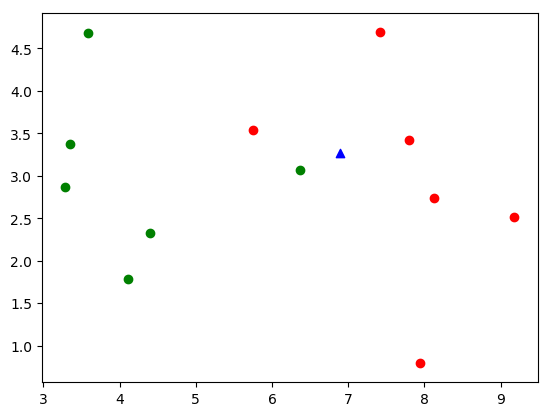

In [11]:
#数据探查，使用matplot将其可视化出来
raw_data_visualization(x_train=x_train, y_train=y_train,x_new=x_new)